In [21]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import seaborn as sn

In [2]:
epochs = "20"
num_moves = "10"
filename = f"Results/epochs_{epochs}/games_{num_moves}.pkl"
results_10 = pickle.load(open(filename, "rb"))

num_moves = "20"
filename = f"Results/epochs_{epochs}/games_{num_moves}.pkl"
results_20 = pickle.load(open(filename, "rb"))

num_moves = "50"
filename = f"Results/epochs_{epochs}/games_{num_moves}.pkl"
results_50 = pickle.load(open(filename, "rb"))

In [31]:
def plot_metric(data1, data2, data3, metric, title):
    
    num_epochs = len(data1)
    epochs = list(range(num_epochs))
    
    #plt.style.use("seaborn")
    fig, ax = plt.subplots(figsize = (8, 5))

    plt.plot(epochs, data1, "-o", label = "10 moves")
    plt.plot(epochs, data2, "-o", label = "20 moves")
    plt.plot(epochs, data3, "-o", label = "50 moves")
    
    plt.xlabel("Epochs", fontsize = 16)
    plt.title(title, fontsize=16)
    plt.ylabel(metric, fontsize = 16)
    plt.ylim([0,1])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.legend()
    
    plt.xlim([-0.75, num_epochs])
    plt.xticks(np.arange(0,num_epochs,2))

    #plt.ylim([0, 1.05])

    #ax.legend(bbox_to_anchor=(2, 1), loc="upper left", borderaxespad=0, fontsize=16)
        
    fig.tight_layout()
    
def plot_cfmat(cf_matrix, num_classes, title):
    
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    
    plt.figure(figsize=(8,5))
    plt.title(title, fontsize=26)
    plt.xlabel("Prediction")
    plt.ylabel("Truth")
    sn.heatmap(df_cm, annot = True, annot_kws={"fontsize":16}, fmt = ".0f", cmap ="Blues", 
               xticklabels=True, yticklabels=True)
    
def plot_all_cfmat(cf_matrix1, cf_matrix2, cf_matrix3, num_classes):
    
#     df_cm1 = pd.DataFrame(cf_matrix1, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
#     df_cm2 = pd.DataFrame(cf_matrix2, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
#     df_cm3 = pd.DataFrame(cf_matrix3, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    
    
    df_cm1 = pd.DataFrame(cf_matrix1 / cf_matrix1.sum(axis=1)[:, np.newaxis], 
                          index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    df_cm2 = pd.DataFrame(cf_matrix2 / cf_matrix2.sum(axis=1)[:, np.newaxis], 
                          index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    df_cm3 = pd.DataFrame(cf_matrix3 / cf_matrix3.sum(axis=1)[:, np.newaxis], 
                          index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    title_list = ["10 Moves", "20 Moves", "50 Moves"]
    
    for i, df_cm in enumerate([df_cm1, df_cm2, df_cm3]):
        ax[i].set_xlabel("Prediction")
        ax[i].set_ylabel("Truth")
#         sn.heatmap(df_cm, annot = True, annot_kws={"fontsize":16}, fmt = ".0f", cmap ="Blues", 
#                    xticklabels=True, yticklabels=True, ax=ax[i])
        
        sn.heatmap(df_cm, annot = True, annot_kws={"fontsize":16}, fmt = ".2%", cmap ="Blues", 
           xticklabels=True, yticklabels=True, ax=ax[i])
        ax[i].set_title(title_list[i], fontsize=22)


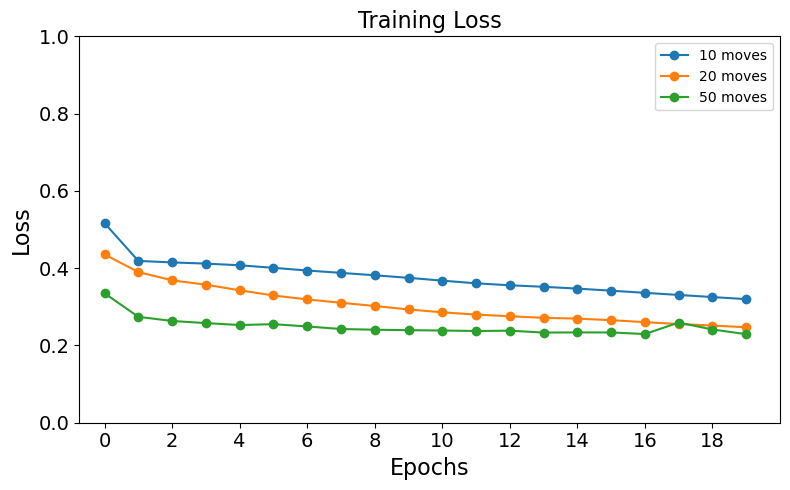

In [32]:
plot_metric(results_10['training_losses'], results_20['training_losses'], results_50['training_losses'],
            "Loss", "Training Loss")

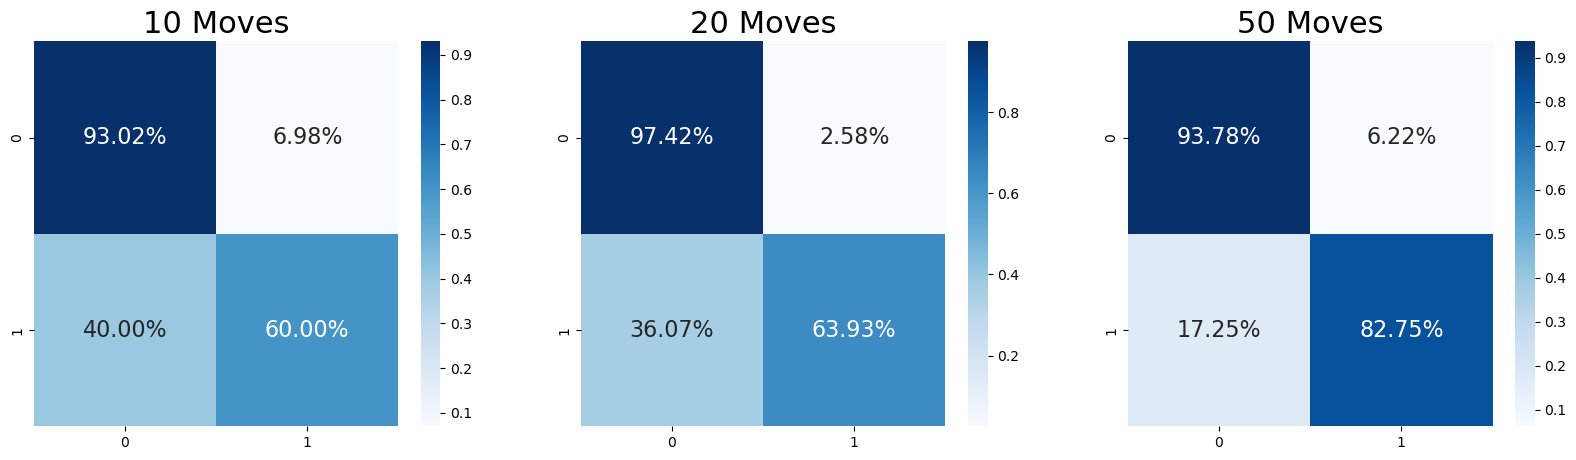

In [33]:
plot_all_cfmat(results_10['mats'][-1], results_20['mats'][-1], results_50['mats'][-1], 2)

In [22]:
results_10.keys()

dict_keys(['valid_losses', 'training_losses', 'labels', 'preds', 'mats'])

In [29]:
acc_10 = accuracy_score(results_10['labels'], results_10['preds'], normalize=True, sample_weight=None)
acc_20 = accuracy_score(results_20['labels'], results_20['preds'], normalize=True, sample_weight=None)
acc_50 = accuracy_score(results_50['labels'], results_50['preds'], normalize=True, sample_weight=None)

In [30]:
print(acc_10, acc_20, acc_50)

0.8253968253968254 0.8267148014440433 0.8855905998763142
